# Mashinsko Ucenje - LAB1

## 151027, Fisnik Limani

For this LAB we are going to use: MAGIC Gamma Telescope Data Set

Link: https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

#### Attribute information:

1. fLength - continuous # major axis of ellipse [mm]
2. fWidth - continuous # minor axis of ellipse [mm]
3. fSize - continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc - continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1 - continuous # ratio of highest pixel over fSize [ratio]
6. fAsym - continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long - continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans - continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha - continuous # angle of major axis with vector to origin [deg]
10. fDist - continuous # distance from origin to center of ellipse [mm]


11. class: g, h # gamma (signal), hadron (background)

# 1. IMPORT THE REQUIRED LIBRARIES

In [3]:
import matplotlib.pyplot as plt #Libraries for visualization
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib notebook
# %matplotlib inline

# 2. LOAD THE MAGIC Gamma Telescope DATA SET

In [7]:
dataset = pd.read_csv('data/magic04.data')
dataset.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [8]:
# We will take into consideration only 6 features: fLength, fWidth, fAsym, fSize, fAlpha, fDist
dataset = dataset.drop(['fConc', 'fConc1', 'fM3Long', 'fM3Trans'], axis='columns')
dataset.head()

,fLength,fWidth,fSize,fAsym,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,27.7004,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,26.2722,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,116.7410,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,27.2107,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,-5.5277,4.6480,356.4620,g


In [261]:
matrix = dataset.values
partitions = np.split(matrix, [6], axis=1)
X = partitions[0]
y = partitions[1].ravel()

classes_names = np.unique(y)
number_of_classes = len(target_names)

feature_names = list(dataset.columns)[0:6]
number_of_features = len(feature_names)

print("Number and names of classes:", number_of_classes, classes_names)
print("Number and names of features: ", number_of_features, feature_names)
print("Number of data points:", X.shape[0])

Number and names of classes: 2 ['g' 'h']
Number and names of features:  6 ['fLength', 'fWidth', 'fSize', 'fAsym', 'fAlpha', 'fDist']
Number of data points: 19020


# 3. VISUALIZATIONS

## 3.1 WHOLE DATA HISTOGRAMS

In [235]:
def indexes_in_y_for_classi(y, classi):
    # print(classi)
    indexes = []
    for i in range(len(y)):
        # print(y[i], classes_names[classi])
        if y[i][0] == classes_names[classi]:
            indexes.append(i)
    # print(indexes)
    return indexes

<IPython.core.display.Javascript object>


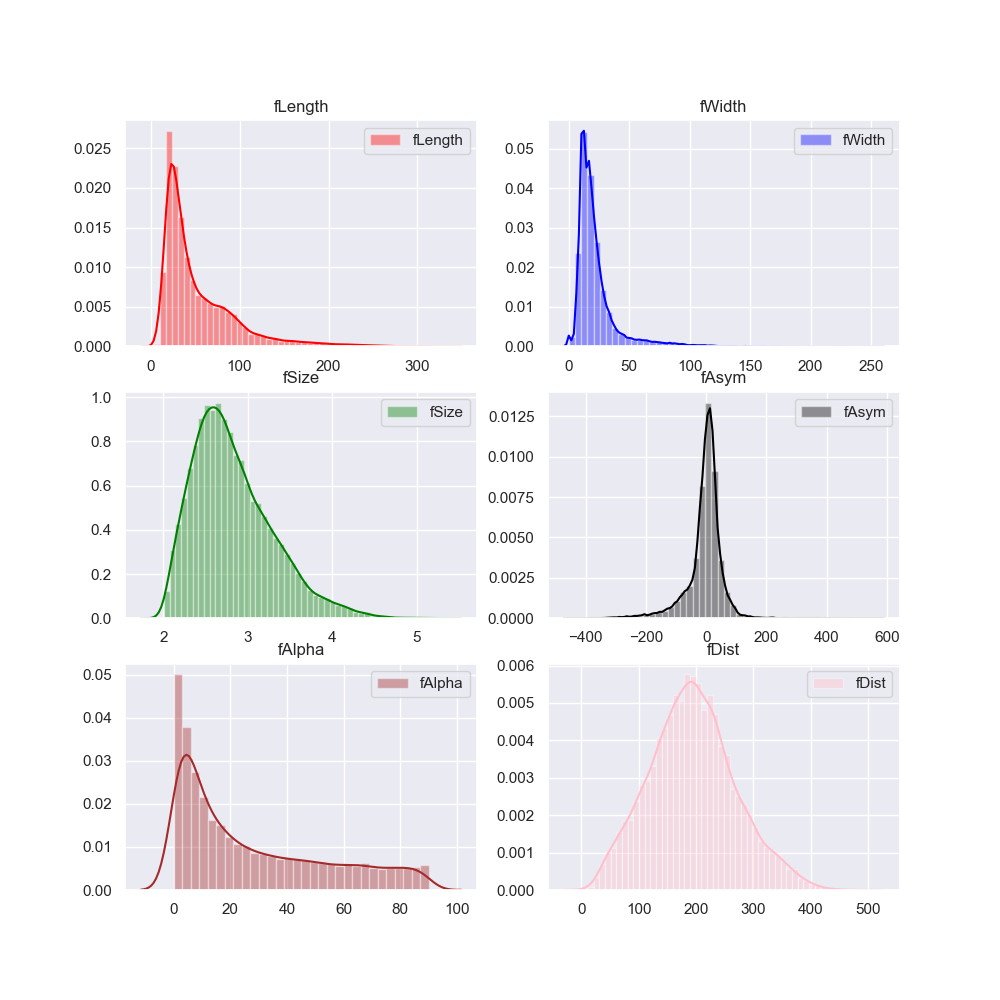

In [267]:
feature_colors = ['red', 'blue', 'green', 'black', 'brown', 'pink']

fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=3, ncols=2)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(3,2, feat_i+1)
    plt.title(feature_names[feat_i])
    column = list(X[:, feat_i])
    sns.distplot(column, label=feature_names[feat_i], color=feature_colors[feat_i]) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)
    plt.legend()
plt.show()

## 3.2 Whole Data Histograms and within class Histograms

<IPython.core.display.Javascript object>


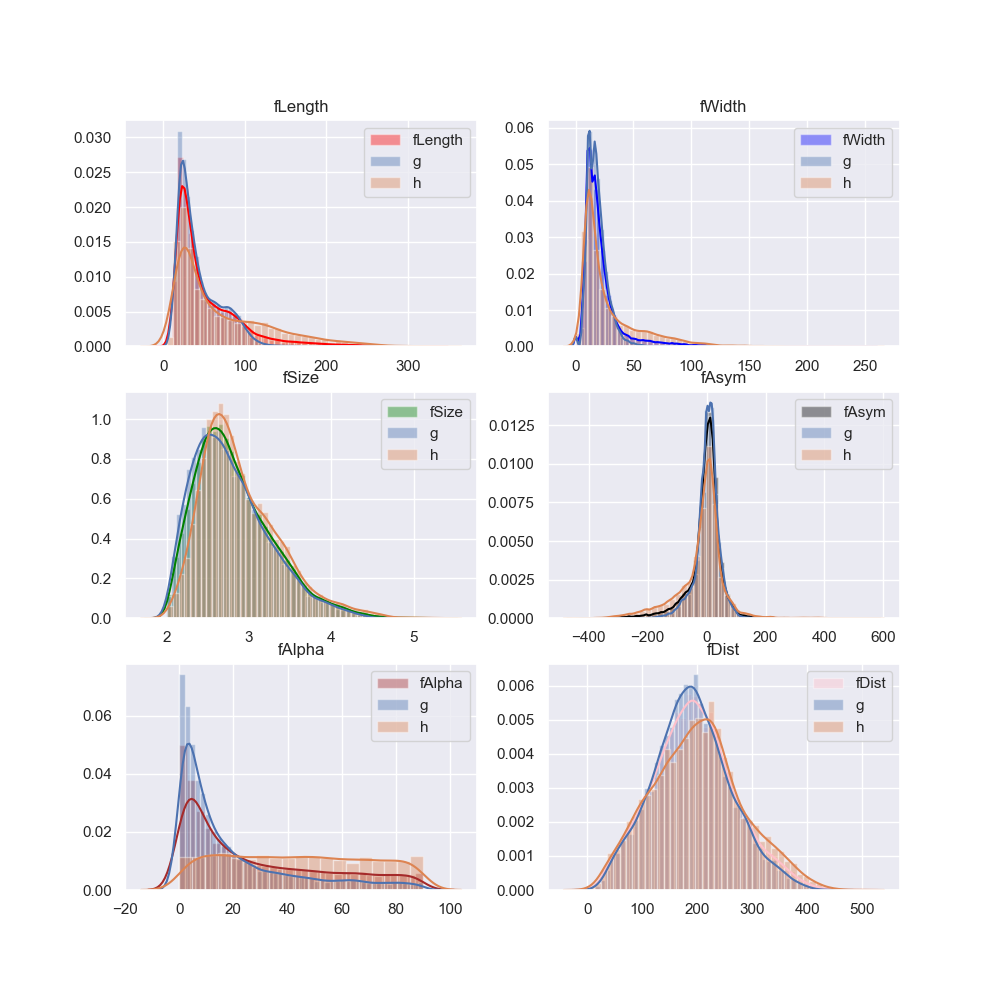

In [306]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=3, ncols=2)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(3,2, feat_i+1)
    plt.title(feature_names[feat_i])
    column = list(X[:, feat_i])
    sns.distplot(column, label=feature_names[feat_i], color=feature_colors[feat_i])
    for class_i in range(number_of_classes): #After that we draw the within-class histograms of the same feature
        rows = indexes_in_y_for_classi(y, class_i)
        values = X[rows, feat_i]
        sns.distplot(list(values), label=classes_names[class_i]) # (X[y==c,i] means we get the i'th column of X where the class in the same row in y is equal to c
    plt.legend()
plt.show()

## 3.2 Feature scatterplots

<IPython.core.display.Javascript object>


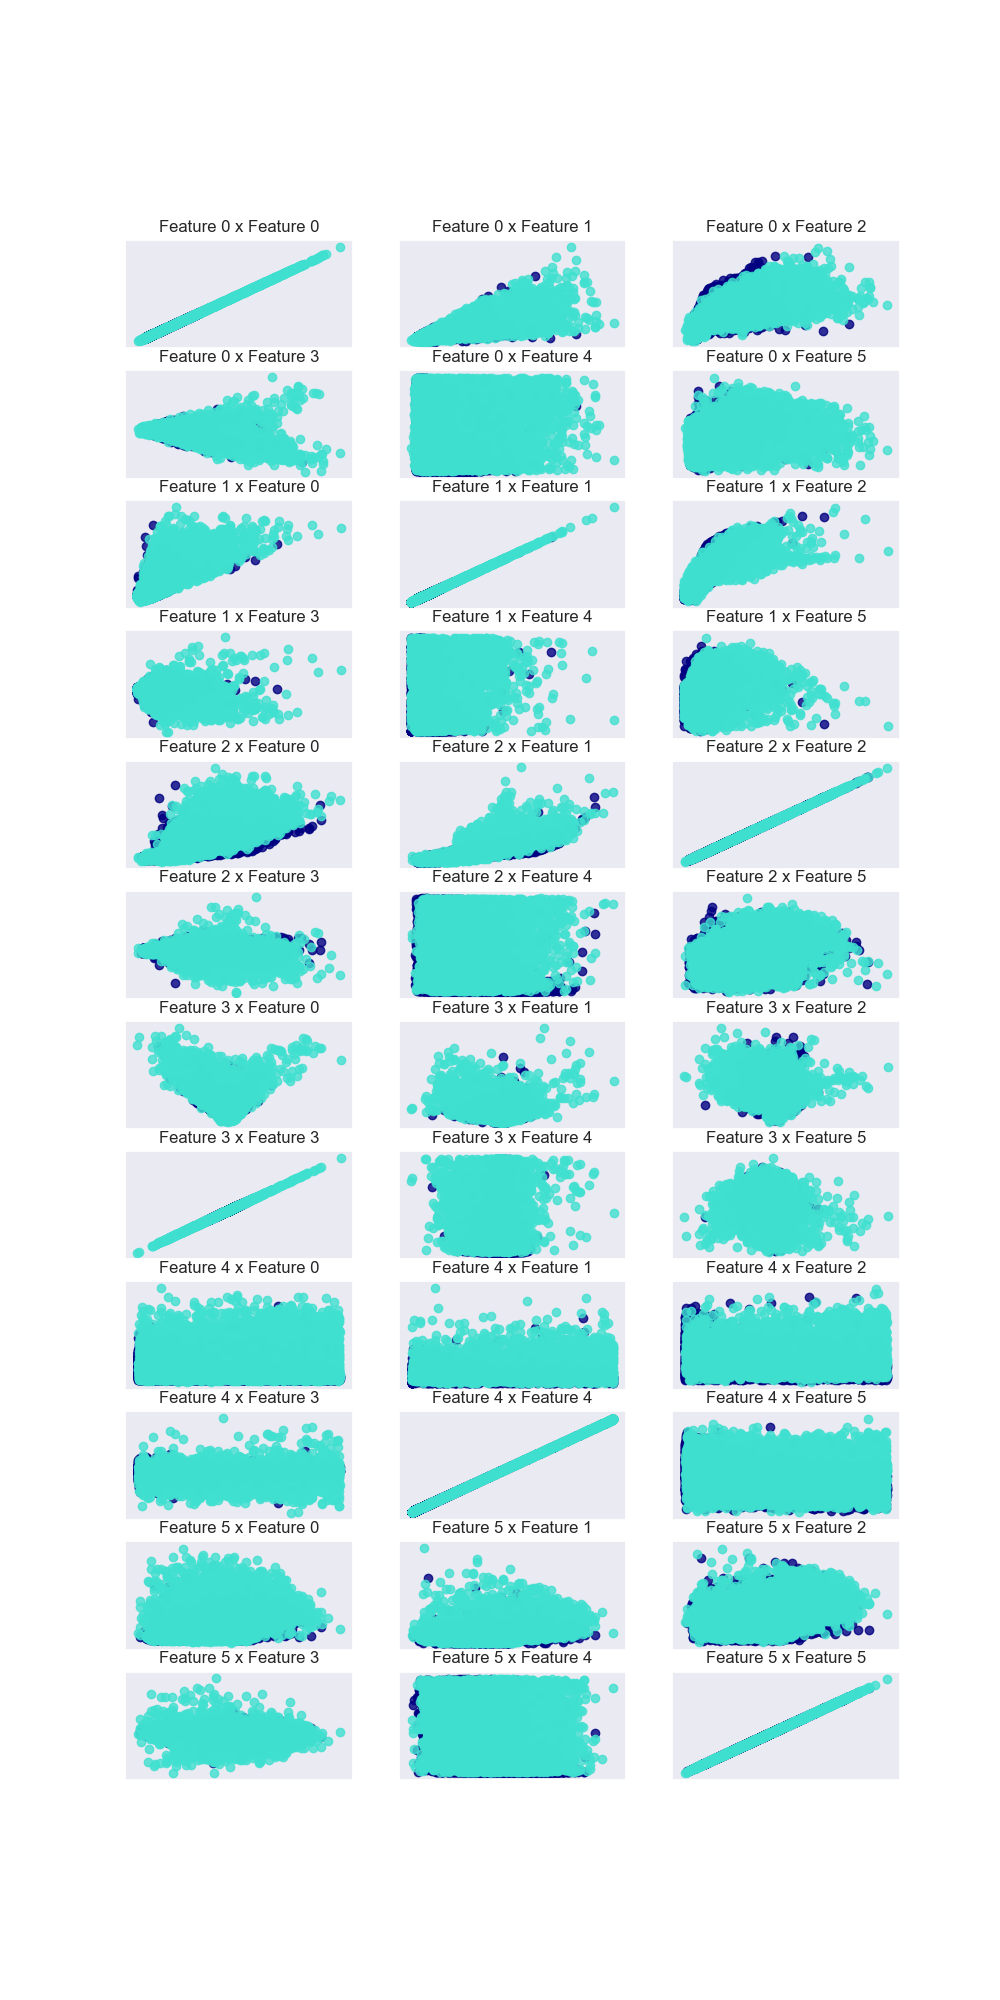

In [313]:
fig = plt.figure(figsize=(10, 20))
plt.title("Scatterplots of the MAGIC Gamma Telescope dataset features")
fig.subplots(nrows=12, ncols=3)
for feat_i in range(number_of_features): #We go over all pairs of features (4x4 in this case)
    for feat_j in range(number_of_features):  
        ax = plt.subplot(12,3,number_of_features*feat_i + feat_j+1)
        # Plot the points
        for color, i, target_name in zip(colors, [0, 1, 2], classes_names):
            plt.scatter(X[indexes_in_y_for_classi(y,i), feat_i], X[indexes_in_y_for_classi(y,i), feat_j], alpha=.8, color=color, label=target_name) #We again extract the feature class specific data using the same method as before and then just use the scatter function
        plt.xticks(())
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" x Feature "+str(feat_j))
plt.show()

## 3.3 Between feature dependence

<IPython.core.display.Javascript object>


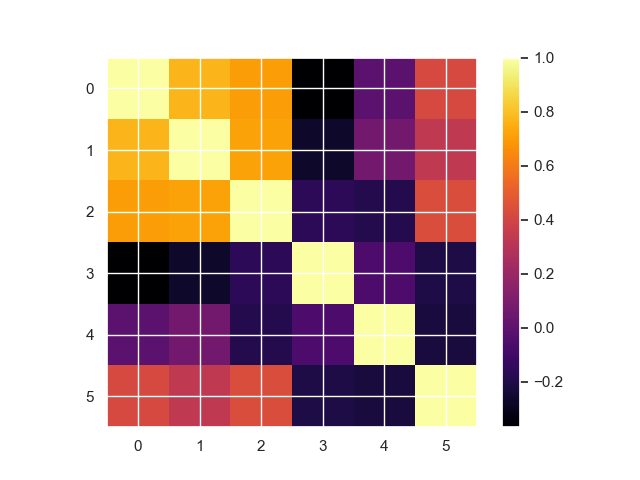

In [305]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): #We need a 4x4 matrix to represent the correlation matrix, where we set the value of Cij to be the correlation between the i'th and the j'th metric
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
fig = plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

# 4. Classification

## 4.1. Splitting the dataset to a training and test set

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.30, random_state=42) #We split the original dataset (we use a fixed random state such as 42 so we always split the data the same way)

## 4.2 Classification on the original dataset

## 4.2.1 Classification using Naive Bayes

In [248]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the original MAGIC Gamma Telescope dataset", accuracy)

Naive Bayes accuracy for the original Iris dataset 0.699


## 4.2.2 Classification using LDA

In [247]:
lda = LinearDiscriminantAnalysis() #We initialize the model
lda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = lda.predict(X_test) #We get the predictions of the test data X_test using the predict function
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the original MAGIC Gamma Telescope dataset", accuracy)

LDA accuracy for the original Iris dataset 0.73


## 4.2.3 Classification using QDA

In [251]:
qda = QuadraticDiscriminantAnalysis() #We initialize the model
qda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = qda.predict(X_test) #We get the predictions of the test data X_test using the predict function
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("QDA accuracy for the original MAGIC Gamma Telescope dataset", accuracy)

QDA accuracy for the original MAGIC Gamma Telescope dataset 0.754


## 5. Conclusion

We've seen that the three models gave us approximately similar accuracy with a small difference.

From the scatterplots we've seen that data are really mixed and is very difficult to find a straight line that could make the difference to some extent between the two classes - so Linear Discriminant Analysis are less accurate than Quadratic Discriminant Analysis

From feature dependence we've seen that some of the features are around 0.7 correlated which means relatively high correlation - so Naive Bayes is supposed to work less accurately